In [120]:
import time
import numpy as np
import random as rn
import scipy.integrate
import matplotlib.pyplot as plt

In [128]:
def integra_mc(fun, a, b, num_puntos=10000):
    
    x = np.linspace(a, b, num = num_puntos)
    puntosY = fun(x) 
    MAX = np.max(puntosY)
    
    #lista_puntos = list()
    #MAX = float('-inf')
    #MIN = float('inf')
    #for i in range(0, num_puntos):
    #    temp = fun(rn.uniform(a,b))
    #    if(temp > MAX): 
    #        MAX = temp
    #    if(temp < MIN):
    #        MIN = temp
    
    #for i in range(0, num_puntos):
                                #X                    #Y
    #    lista_puntos.append( (rn.uniform(a, b), rn.uniform(0, MAX)) )
    num_debajo = 0
    for i in range(0, num_puntos):
        x = rn.uniform(a, b)
        y = rn.uniform(0, MAX)
        if(y < fun(x)):
            num_debajo = num_debajo+1
    
    return (num_debajo/num_puntos)*(b-a)*MAX

In [102]:
def integra_mc_vec(fun, a, b, num_puntos):

    x = np.linspace(a, b, num = num_puntos)
    puntosY = fun(x) 
    MAX = np.max(puntosY)
    
    y = np.random.uniform(0, MAX, num_puntos)
    
    num_debajo = np.sum(y < puntosY)
    
    res = (num_debajo/num_puntos)*(b-a)*MAX
    
    return res

In [125]:
def compara_tiempos(fun):
    
    sizes = np.linspace(100, 10000000, 20) 
    
    times_iter = [] 
    times_vec = []
    
    for size in sizes: 
        
        a = 1
        b = 100
        
        tic = time.process_time()
        res_iter = integra_mc(fun, a, b, int(size))
        toc = time.process_time()
        times_iter += [1000  * (toc - tic)]
        
        tic = time.process_time()
        res_vec = integra_mc_vec(fun, a, b, int(size))
        toc = time.process_time()
        times_vec += [1000  * (toc - tic)]
        
        p1 = len(sizes)
        p2 = len(times_iter)
        
        #print("size1", p1, "size2", p2)
        
    plt.figure()
    plt.scatter(sizes, times_iter,  c='red',  label='bucle')
    plt.scatter(sizes, times_vec, c='blue',  label='vector')
    plt.legend()
    plt.savefig('compara_tiempos_dot.png')
    

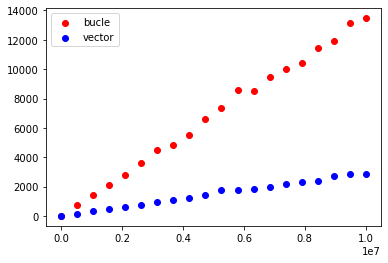

In [5]:
compara_tiempos(np.sin)

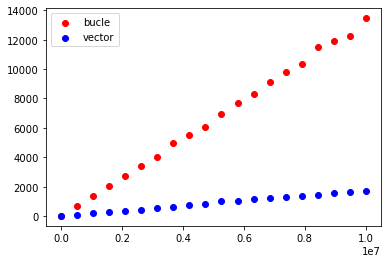

In [23]:
compara_tiempos(np.sin)

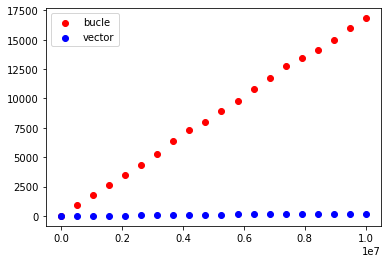

In [126]:
compara_tiempos(np.sin)

In [6]:

scipy.integrate.quad(math.sin,1,3)

(1.530294802468585, 1.698968524164829e-14)

In [121]:
integra_mc(np.sin, 1,3, 900000)

1.5299866666666522

In [122]:
integra_mc_vec(np.sin, 1,3, 900000)

1.5286577777777632

In [106]:
scipy.integrate.quad(math.log,1,3)

(1.2958368660043291, 1.43866792479611e-14)

In [109]:
integra_mc(np.log, 1,3, 10000)

1.291968051473697

In [123]:
integra_mc_vec(np.log, 1, 3, 10000)

1.3009766722407756